## Preparing data for analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
files=[file for file in os.listdir('F:\\5-Sales Data Analysis-20201011T075224Z-001\\5-Sales Data Analysis\\Sales_Data')]
sales=pd.DataFrame()
path='F:\\5-Sales Data Analysis-20201011T075224Z-001\\5-Sales Data Analysis\\Sales_Data'
for file in files:
    cur_file=pd.read_csv(path+"/"+file)
    sales=pd.concat([sales,cur_file])
sales.shape

(186850, 6)

In [6]:
sales=sales.dropna(how='all')
sales.shape

(186305, 6)

## Best month for sale

In [7]:
def split_month(date):
    return date.split('/')[0]
sales['order_month']=sales['Order Date'].apply(split_month)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [8]:
sales['order_month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [9]:
sales=sales[~(sales['order_month']=='Order Date')]
sales['order_month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

Text(0, 0.5, 'monthly sales')

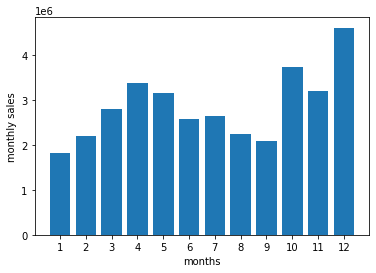

In [10]:
sales['order_month']=sales['order_month'].astype(int)
sales['Quantity Ordered']=sales['Quantity Ordered'].astype(int)
sales['Price Each']=sales['Price Each'].astype(float)
sales['total']=sales['Price Each']*sales['Quantity Ordered']
sales_sum=sales.groupby('order_month')['total'].sum()
months=range(1,13)
plt.bar(months,sales_sum)
plt.xticks(months)
plt.xlabel('months')
plt.ylabel('monthly sales')

## City with max orders

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

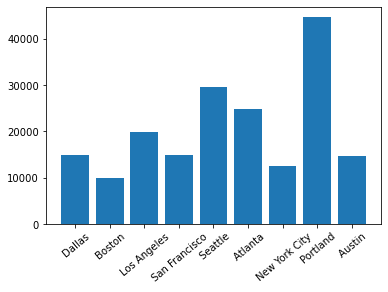

In [11]:
def city_split(city):
    return city.split(',')[1]
sales['city']=sales['Purchase Address'].apply(city_split)
plt.bar(sales['city'].unique(),sales.groupby('city')['city'].count())
plt.xticks(rotation=40)

## Time when sales of a product is max

In [12]:
sales['hour']=pd.to_datetime(sales['Order Date']).dt.hour

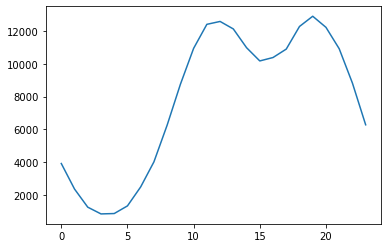

In [15]:
hour=[]
sale=[]
for key,sales_df in sales.groupby('hour'):
    hour.append(key)
    sale.append(len(sales_df))
plt.plot(hour,sale)

## what product sold max and why?

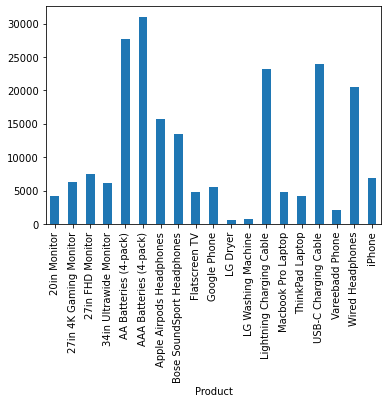

In [17]:
sales.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [18]:
sales.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [24]:
product=sales['Product'].unique()
quantity=sales.groupby('Product')['Quantity Ordered'].sum()
prices=sales.groupby('Product')['Price Each'].unique()

[Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'iPhone'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '20in Monitor'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, '34in Ultrawide Monitor')]

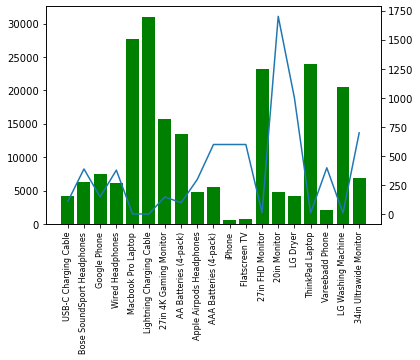

In [29]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(product,quantity,color='g')
ax2.plot(product,prices)
ax1.set_xticklabels(product,rotation='vertical',size=8)

## what products are most often sold together?

In [33]:
dup=sales[sales['Order ID'].duplicated(keep=False)]
dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,total,city,hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11


In [35]:
dup['grouped']=dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup=dup.drop_duplicates(subset=['Order ID'])
dup.head()

<ipython-input-35-8eeab6586ae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['grouped']=dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order_month,total,city,hour,grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"


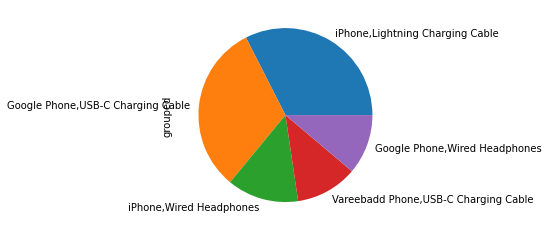

In [37]:
dup['grouped'].value_counts()[0:5].plot.pie()